**(a) (5 points) Load the data files to your S3 bucket. Using the pandas library, read the csv data file and create two data-frames called: telecom_train (for churn-bigml-80.csv) and telecom_test (for churn-bigml-20.csv).**



In [1]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action= 'ignore', category=FutureWarning)

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score

#defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'craig-shaffer-data-445-bucket'
bucket = s3.Bucket(bucket_name)

#defining the file to be read from s3 bucket
file_key1 = 'churn-bigml-80.csv'
file_key2 = 'churn-bigml-20.csv'

bucket_object1 = bucket.Object(file_key1)
file_object1 = bucket_object1.get()
file_content_stream1 = file_object1.get('Body')

bucket_object2 = bucket.Object(file_key2)
file_object2 = bucket_object2.get()
file_content_stream2 = file_object2.get('Body')

#reading the datafiles
telecom_train = pd.read_csv(file_content_stream1)
telecom_test = pd.read_csv(file_content_stream2)

In [2]:
telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
telecom_test.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


**(b) (12 points) Conduct the following feature engineering:**
- **Change the Churn variable from a categorical variable to a numerical variable. That is, change True to 1 and False to 0 in both data-frames: telecom train and telecom test.**
- **Change the International plan variable from a categorical variable to a numerical variable. That is, change Yes to 1 and False to 0 in both data-frames: telecom train and telecom test**
- **Change the Voice mail plan variable from a categorical variable to a numerical variable. That is, change Yes to 1 and False to 0 in both data-frames: telecom train and telecom test**
- **Create a new variable called: total charge as the sum of Total day charge, Total eve charge, Total night charge, and Total intl charge in both dataframes: telecom train and telecom test**

In [4]:
#change Churn yes/no to 1/0
telecom_train['Churn'].replace([True, False], [1,0], inplace = True)
telecom_test['Churn'].replace([True, False], [1,0], inplace  = True)

#change International_plan yes/no to 1/0
telecom_train['International_plan'].replace(['Yes', 'No'], [1,0], inplace = True)
telecom_test['International_plan'].replace(['Yes', 'No'], [1,0], inplace = True)

#change Voice_mail_plan yes/no to 1/0
telecom_train['Voice_mail_plan'].replace(['Yes', 'No'], [1,0], inplace= True)
telecom_test['Voice_mail_plan'].replace(['Yes', 'No'], [1,0], inplace= True)

#create total_charge
telecom_train = telecom_train.assign(total_charge = telecom_train['Total_day_charge'] + telecom_train['Total_eve_charge'] + telecom_train['Total_night_charge']+ telecom_train['Total_intl_charge'])
telecom_test = telecom_test.assign(total_charge = telecom_test['Total_day_charge'] + telecom_test['Total_eve_charge'] + telecom_test['Total_night_charge']+ telecom_test['Total_intl_charge'])

In [5]:
telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,total_charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


In [6]:
telecom_test.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,total_charge
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,0,73.32
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,1,54.20
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,1,92.29
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,0,41.05
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,0,49.60


**(c) (5 points) In both data-frames telecom train and telecom test, only keep the following variables: Account length, International plan, Voice mail plan, total charge, Customer service calls, and Churn.**

In [7]:
telecom_train = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls','Churn']]
telecom_test = telecom_test[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls','Churn']]

In [8]:
telecom_train.head()

,Account_length,International_plan,Voice_mail_plan,total_charge,Customer_service_calls,Churn
0,128,0,1,75.56,1,0
1,107,0,1,59.24,1,0
2,137,0,0,62.29,0,0
3,84,1,0,66.80,2,0
4,75,1,0,52.09,3,0


In [9]:
telecom_test.head()

,Account_length,International_plan,Voice_mail_plan,total_charge,Customer_service_calls,Churn
0,117,0,0,73.32,1,0
1,65,0,0,54.20,4,1
2,161,0,0,92.29,4,1
3,111,0,0,41.05,2,0
4,49,0,0,49.60,1,0


**(d) (20 points) Consider the telecom train dataset. Using Account length, International plan, Voice mail plan, total charge, and Customer service calls as the input variables, and Churn is the target variable. Do the following:**
- **(1) Split the data into train (80%) and test (20%) taking into account the proportion of 0s and 1s in the data. That is, if Y is the target variable, in train test split function, you need to add the extra argument stratify = Y.**
- **(2) Using the MinMaxScaler function, transform each of the variables in the train dataset to a 0-1 scale.**
- **(3) Using the train dataset:**
    - **(i) Estimate the optimal lambda for the LASSO model using default values for lambda in scikit-learn and 5-folds.**
    - **(ii) Perform LASSO as a variable selector (using the optimal lambda from previous step (i)).**

**Repeat steps (1)-(3) 1000 times. Store the estimated model coefficients of each iteration in a data-frame. Remove the variables, whose estimated coefficients is 0 more than 200 times, from the telecom train and telecom test datasets.**

In [10]:
#defining input and target variables
x = telecom_train[['Account_length', 'International_plan', 'Voice_mail_plan', 'total_charge', 'Customer_service_calls']]
y = telecom_train['Churn']

#list to store coefficients
coef = list()

for i in range (0,1000):
    #split into train and test
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)
    
    #transforming the input data
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    
    #extracting best lambda with lasso cross-validation
    lasso_cv = LassoCV(normalize = True, cv = 5).fit(x_train, y_train)
        
    #building lasso
    lasso_md = Lasso(alpha = lasso_cv.alpha_, normalize = True).fit(x_train,y_train)
    
    #storing estimated coefficients
    coef.append(lasso_md.coef_)
    
#turning the list to dataframe
coef_data = pd.DataFrame(coef)  
coef_data

,0,1,2,3,4
0,0.029014,0.294095,-0.082366,0.527520,0.548246
1,0.049225,0.310804,-0.074556,0.458441,0.560693
2,0.034946,0.326154,-0.090035,0.514383,0.523713
3,0.029743,0.348107,-0.079153,0.504420,0.517064
4,0.024063,0.314091,-0.071940,0.481674,0.472013
...,...,...,...,...,...
995,0.031822,0.318742,-0.076023,0.497160,0.552546
996,0.000724,0.308632,-0.071889,0.449412,0.475880
997,0.057196,0.310269,-0.076498,0.514012,0.552854
998,0.012689,0.334021,-0.076987,0.506602,0.505790


In [11]:
zeros = (coef_data ==0).sum()
zeros

0    259
1      0
2      0
3      0
4      0
dtype: int64

We should remove Account_length because its coefficient was estimated to be zero 259 times.

In [12]:
telecom_train = telecom_train.drop(['Account_length'], axis = 1)
telecom_test = telecom_test.drop(['Account_length'], axis = 1)

In [13]:
telecom_train.head()

,International_plan,Voice_mail_plan,total_charge,Customer_service_calls,Churn
0,0,1,75.56,1,0
1,0,1,59.24,1,0
2,0,0,62.29,0,0
3,1,0,66.80,2,0
4,1,0,52.09,3,0


In [14]:
telecom_test.head()

,International_plan,Voice_mail_plan,total_charge,Customer_service_calls,Churn
0,0,0,73.32,1,0
1,0,0,54.20,4,1
2,0,0,92.29,4,1
3,0,0,41.05,2,0
4,0,0,49.60,1,0


**(e) (45 points) Consider the telecom train dataset. Using Churn as the target variable, and the remaining variables as the input variables. Do the following:**
- **(i) Split the data into 5-folds taking into account the proportion of 0s and 1s in the data. Notice that you can conduct k-folds splitting of the data taking into account of the proportion of 0s and 1s in the data using the StratifiedKFold function from sklearn.model selection library.**
- **(ii) Using MinMaxScaler, transform all the input variables in the train and test datasets to 0-1 scale.**
    - **Build a logistic regression model. Use solver = ’liblinear’ and penalty = ’l1’ to build the logistic regression model. After that, use the model to predict on the test dataset. Using 10% as the cut-off value, compute the recall of this model. Report the average recall score across the 5-folds.**
    - **Build a logistic regression model. Use solver = ’liblinear’ and penalty = ’l2’ to build the logistic regression model. After that, use the model to predict on the test dataset. Using 10% as the cut-off value, compute the recall of this model. Report the average recall score across the 5-folds.**
    - **Build a logistic regression model. Use solver = ’saga’ and penalty = ’l1’ to build the logistic regression model. After that, use the model to predict on the test dataset. Using 10% as the cut-off value, compute the recall of this model. Report the average recall score across the 5-folds.**
    - **Build a logistic regression model. Use solver = ’saga’ and penalty = ’l2’ to build the logistic regression model. After that, use the model to predict on the test dataset. Using 10% as the cut-off value, compute the recall of this model. Report the average recall score across the 5-folds.**

In [15]:
#defining input and target variables
x = telecom_train.drop(columns = ['Churn'], axis = 1)
y = telecom_train['Churn']

kfold = StratifiedKFold(n_splits = 5, shuffle = True)
   
#list to store fold results
md1_fold_result = list()
md2_fold_result = list()
md3_fold_result = list()
md4_fold_result = list()

for train_ix, test_ix in kfold.split(x,y):
    #splitting the data
    x_train,x_test = x.iloc[train_ix],x.iloc[test_ix]
    y_train,y_test = y.iloc[train_ix],y.iloc[test_ix]
    
    #transforming the input data
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    
    #build model 1: liblinear & l1 model
    md1 = LogisticRegression(solver ='liblinear', penalty ='l1').fit(x_train, y_train)
    #predicting on test set
    md1_pred = md1.predict_proba(x_test)[:,1]
    #changing liklihoods to label w/ 10% cutoff
    md1_labels = np.where(md1_pred<0.10,0,1)
    #compute recall and store it
    md1_recall = recall_score(y_test, md1_labels)
    md1_fold_result.append(md1_recall)
    
    #build model 2: liblinear & l2 model
    md2 = LogisticRegression(solver ='liblinear', penalty ='l2').fit(x_train, y_train)
    #predicting on test set
    md2_pred = md2.predict_proba(x_test)[:,1]
    #changing liklihoods to label w/ 10% cutoff
    md2_labels = np.where(md2_pred<0.10,0,1)
    #compute recall and store it
    md2_recall = recall_score(y_test, md2_labels)
    md2_fold_result.append(md2_recall)
        
    #build model 3: saga & l1 model
    md3 = LogisticRegression(solver ='saga', penalty ='l1').fit(x_train, y_train)
    #predicting on test set
    md3_pred = md3.predict_proba(x_test)[:,1]
    #changing liklihoods to label w/ 10% cutoff
    md3_labels = np.where(md3_pred<0.10,0,1)
    #compute recall and store it
    md3_recall = recall_score(y_test, md3_labels)
    md3_fold_result.append(md3_recall)
    
    #build model 4: saga & l2 model
    md4 = LogisticRegression(solver ='saga', penalty ='l2').fit(x_train, y_train)
    #predicting on test set
    md4_pred = md4.predict_proba(x_test)[:,1]
    #changing liklihoods to label w/ 10% cutoff
    md4_labels = np.where(md4_pred<0.10,0,1)
    #compute recall and store it
    md4_recall = recall_score(y_test, md4_labels)
    md4_fold_result.append(md4_recall)

md1_rec_avg = np.mean(md1_fold_result)  
md2_rec_avg = np.mean(md2_fold_result)  
md3_rec_avg = np.mean(md3_fold_result)  
md4_rec_avg = np.mean(md4_fold_result)

print('the avg recall of model 1:', md1_rec_avg)
print('the avg recall of model 2:', md2_rec_avg)
print('the avg recall of model 3:', md3_rec_avg)
print('the avg recall of model 4:', md4_rec_avg)

the avg recall of model 1: 0.8710289710289709
the avg recall of model 2: 0.8916416916416917
the avg recall of model 3: 0.8658341658341658
the avg recall of model 4: 0.876157176157176


**(f) (30 points) Repeat part (e) 100 times. Create a visualization that shows the recall value for each of the models at each iteration. Also, report the average recall of each of the model for the 100 repetitions. Which of the two considered logistic regression using solver = ’liblinear’ models would use to predict Churn? Which of the two considered logistic regression using solver = ’saga’ models would use to predict Churn?**

In [18]:
#defining input and target variables
x = telecom_train.drop(columns = ['Churn'], axis = 1)
y = telecom_train['Churn']    
 
#list to store model results
md1_results = list()
md2_results = list()
md3_results = list()
md4_results = list()    

for i in range(0,100):
    
    kfold = StratifiedKFold(n_splits = 5, shuffle = True)
   
    #list to store fold results
    md1_fold_result = list()
    md2_fold_result = list()
    md3_fold_result = list()
    md4_fold_result = list()

    for train_ix, test_ix in kfold.split(x,y):
        #splitting the data
        x_train,x_test = x.iloc[train_ix],x.iloc[test_ix]
        y_train,y_test = y.iloc[train_ix],y.iloc[test_ix]
    
        #transforming the input data
        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.fit_transform(x_test)
    
        #build model 1: liblinear & l1 model
        md1 = LogisticRegression(solver ='liblinear', penalty ='l1').fit(x_train, y_train)
        #predicting on test set
        md1_pred = md1.predict_proba(x_test)[:,1]
        #changing liklihoods to label w/ 10% cutoff
        md1_labels = np.where(md1_pred<0.10,0,1)
        #compute recall and store it
        md1_recall = recall_score(y_test, md1_labels)
        md1_fold_result.append(md1_recall)
    
        #build model 2: liblinear & l2 model
        md2 = LogisticRegression(solver ='liblinear', penalty ='l2').fit(x_train, y_train)
        #predicting on test set
        md2_pred = md2.predict_proba(x_test)[:,1]
        #changing liklihoods to label w/ 10% cutoff
        md2_labels = np.where(md2_pred<0.10,0,1)
        #compute recall and store it
        md2_recall = recall_score(y_test, md2_labels)
        md2_fold_result.append(md2_recall)
        
        #build model 3: saga & l1 model
        md3 = LogisticRegression(solver ='saga', penalty ='l1').fit(x_train, y_train)
        #predicting on test set
        md3_pred = md3.predict_proba(x_test)[:,1]
        #changing liklihoods to label w/ 10% cutoff
        md3_labels = np.where(md3_pred<0.10,0,1)
        #compute recall and store it
        md3_recall = recall_score(y_test, md3_labels)
        md3_fold_result.append(md3_recall)
    
        #build model 4: saga & l2 model
        md4 = LogisticRegression(solver ='saga', penalty ='l2').fit(x_train, y_train)
        #predicting on test set
        md4_pred = md4.predict_proba(x_test)[:,1]
        #changing liklihoods to label w/ 10% cutoff
        md4_labels = np.where(md4_pred<0.10,0,1)
        #compute recall and store it
        md4_recall = recall_score(y_test, md4_labels)
        md4_fold_result.append(md4_recall)

    md1_rec_avg = np.mean(md1_fold_result)
    md1_results.append(md1_rec_avg)
    md2_rec_avg = np.mean(md2_fold_result)
    md2_results.append(md2_rec_avg)
    md3_rec_avg = np.mean(md3_fold_result)
    md3_results.append(md3_rec_avg)
    md4_rec_avg = np.mean(md4_fold_result)
    md4_results.append(md4_rec_avg)

print('the avg recall of model 1 is:',np.mean(md1_results))
print('the avg recall of model 2 is:',np.mean(md2_results))
print('the avg recall of model 3 is:',np.mean(md3_results))
print('the avg recall of model 4 is:',np.mean(md4_results))

the avg recall of model 1 is: 0.8758951048951049
the avg recall of model 2 is: 0.8991438561438563
the avg recall of model 3 is: 0.872851481851482
the avg recall of model 4 is: 0.8864135864135867


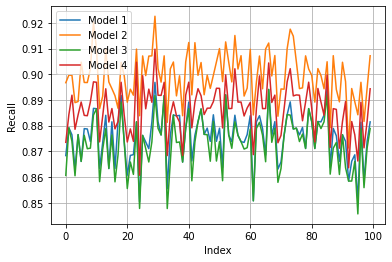

In [19]:
index=np.linspace(0,99,num=100)
plt.plot(index,md1_results, label = 'Model 1')
plt.plot(index,md2_results, label = 'Model 2')
plt.plot(index,md3_results, label = 'Model 3')
plt.plot(index,md4_results, label = 'Model 4')
plt.xlabel('Index')
plt.ylabel('Recall')
plt.legend()
plt.grid()
plt.show()

Of the two considered logistic regression using solver = 'liblinear', I would choose model 2 (l2 penalty) to predit Churn because it had the higher avg recall.

Of the two considered logistic regression using solver = 'saga', I would choose model 4 (l2 penalty) to predict Churn because it had the higher avg recall.

**(g) (25 points) Using the MinMaxScaler function, transform each of the input variables in the telecom train and telecom test data-frames to a 0-1 scale. Using the telecom train build two models: the best logistic regression model using solver = ’liblinear’ from part (f) and the best logistic regression model using solver = ’saga’ form part (f). Using these to two models, predict the likelihood of Churn on the telecom test dataframe. Using 10% as the cut-off value, compute the recall of each of the two models. What model would use to predict Churn?**

In [20]:
#defining input and target variables
x_train = telecom_train.drop(columns = ['Churn'], axis = 1)
y_train = telecom_train['Churn']    

x_test = telecom_test.drop(columns = ['Churn'], axis = 1)
y_test = telecom_test['Churn']   

#transforming the input data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#build model 2 and 4 because they were the best models using solvers'liblinear' and 'saga' from part f

#build model 2: liblinear & l2 model
md2 = LogisticRegression(solver ='liblinear', penalty ='l2').fit(x_train, y_train)
#predicting on test set
md2_pred = md2.predict_proba(x_test)[:,1]
#changing liklihoods to label w/ 10% cutoff
md2_labels = np.where(md2_pred<0.10,0,1)
#compute recall and store it
md2_recall = recall_score(y_test, md2_labels)

#build model 4: saga & l2 model
md4 = LogisticRegression(solver ='saga', penalty ='l2').fit(x_train, y_train)
#predicting on test set
md4_pred = md4.predict_proba(x_test)[:,1]
#changing liklihoods to label w/ 10% cutoff
md4_labels = np.where(md4_pred<0.10,0,1)
#compute recall and store it
md4_recall = recall_score(y_test, md4_labels)

print('the recall of model 2 is:', md2_recall)
print('the recall of model 4 is:', md4_recall)


the recall of model 2 is: 0.9157894736842105
the recall of model 4 is: 0.9157894736842105


The recall of model 2 and 4 for this split of the data is the same for predicting Churn. However, our results from part f show us that model 2 has an average higher recall than model 4 through many splits. So, based on the information we have, I would choose model 2 (liblinear & l2) to predict Churn.